## Multiple Linear Regression for House Price Prediction

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [2]:
# 1. Fetch California Housing Dataset
california_housing = fetch_california_housing(as_frame=True)
california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [3]:
# convert dataset to usable formats. (data-features & target-prediction) (revise- feature vs sample.)

df_california_housing = california_housing.data
df_california_housing['target'] = california_housing.target
df_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df_california_housing.to_csv('california_housing_dataset.csv', index=False)

In [5]:
# 2. Linear Regression
#features except last target column
X = df_california_housing.drop(columns=['target'])  
y = df_california_housing['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# model->fit values->predict values->find errors

model = linear_model.LinearRegression()

#fit the models with MedInc and the actual values
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

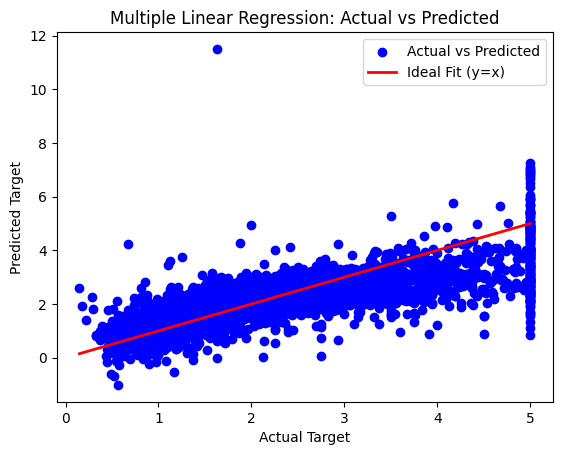

In [7]:

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit (y=x)')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [8]:
#r2_score
metrics.r2_score(y_test, y_pred)

0.5757877060324511

In [9]:
#mse
metrics.mean_squared_error(y_test, y_pred)

0.555891598695244

## Extra: Predict Based on User Input:

In [10]:
# List of feature names in order
feature_names = X.columns.tolist()

In [11]:
# Prompt user for input for each feature
input_features = []
print('Enter the following features:')
for feature in feature_names:
    value = float(input(f'{feature}: '))
    input_features.append(value)

Enter the following features:


In [12]:
# Convert to DataFrame
input_df = pd.DataFrame([input_features], columns=feature_names)

In [13]:
# Predict using the trained model
predicted_price = model.predict(input_df)[0]
print(f'Predicted (median) house price (in 100,000s): {predicted_price:.2f}')

Predicted (median) house price (in 100,000s): -2036.67
